In [43]:
import numpy as np
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [44]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [45]:
star_wars_nonull = star_wars.loc[star_wars['RespondentID'].notnull() == True, ]
yes_no = {
    "Yes": True,
    "No": False
}
star_wars_clean2 = star_wars_nonull.copy()
star_wars_clean2['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars_clean2['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars_clean2['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars_clean2['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
print(star_wars_clean2['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
print(star_wars_clean2['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [46]:
map_ep = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for name in star_wars_clean2.columns[3:9]:
    star_wars_clean2[name] = star_wars_clean2[name].map(map_ep)

In [47]:
map_cols =  {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
}

star_wars_clean2 = star_wars_clean2.rename(columns = map_cols)
print(star_wars_clean2.head())


   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  \
1    True

In [60]:
star_wars_clean2[star_wars_clean2.columns[9:15]] = star_wars_clean2[star_wars_clean2.columns[9:15]].astype(float)

map_rank = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
}

star_wars_clean2 = star_wars_clean2.rename(columns = map_rank)

In [61]:
print(star_wars_clean2.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

<Container object of 6 artists>

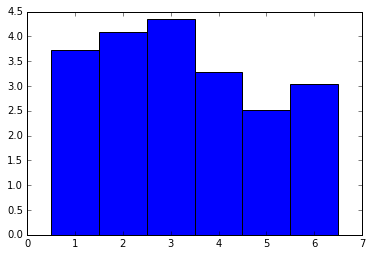

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

means = star_wars_clean2[['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']].mean()
plt.bar([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], means, 1)

Our boys from episode 5 have the lowest score so you know they be the most popular

<Container object of 6 artists>

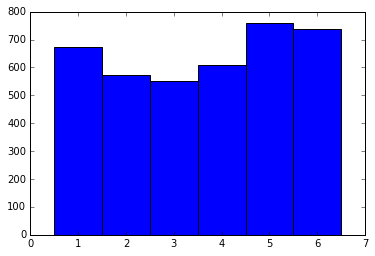

In [68]:
seen = star_wars_clean2.loc[:,'seen_1':'seen_6'].sum()
plt.bar([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], seen, 1)

People love episode 5 the most because they've seen it the most!

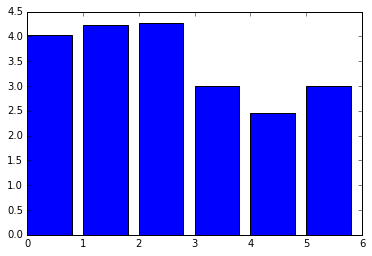

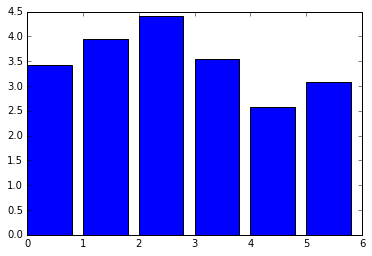

In [71]:
males = star_wars_clean2[star_wars_clean2["Gender"] == "Male"]
females = star_wars_clean2[star_wars_clean2["Gender"] == "Female"]

plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

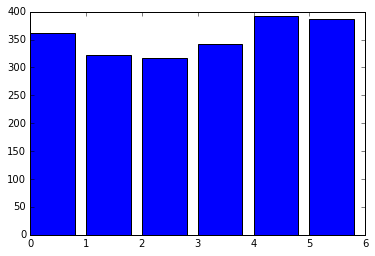

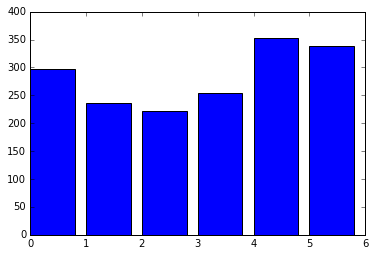

In [70]:
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

Males watched and disliked the prequel triology (episodes 1-3) much more than females did